<a href="https://colab.research.google.com/github/afebrii/ZooSavvy/blob/master/ModelMLImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

# Ganti path_zip dengan path tempat file zip Anda disimpan di Google Drive
path_zip = "AnimalML.zip"

# Ganti path_extract dengan path tempat Anda ingin mengekstrak file zip
path_extract = "AnimalML"

# Mengekstrak file zip
with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_extract)

# Menampilkan daftar file yang telah diekstrak
extracted_files = os.listdir(path_extract)
print("File yang telah diekstrak:", extracted_files)


File yang telah diekstrak: ['AnimalML']


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ganti path_dataset dengan path tempat dataset Anda disimpan
path_dataset = "AnimalML/AnimalML"


# Tentukan ukuran batch
batch_size = 128
# Membuat generator untuk data training
train_datagen = ImageDataGenerator(
    validation_split=0.2,  # Pembagian dataset menjadi train dan
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Example: Adding rotation
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    path_dataset,
    target_size=(224, 224),  # Sesuaikan dengan ukuran input CNN Anda
    batch_size=batch_size,
    seed=100,
    class_mode='categorical',  # Sesuaikan dengan jenis klasifikasi yang Anda lakukan
    subset='training'  # Menandakan bahwa ini adalah bagian training set
)

# Membuat generator untuk data validasi
validation_generator = train_datagen.flow_from_directory(
    path_dataset,
    target_size=(224, 224),  # Sesuaikan dengan ukuran input CNN Anda
    batch_size=batch_size,
    seed=200,
    class_mode='categorical',  # Sesuaikan dengan jenis klasifikasi yang Anda lakukan
    subset='validation'  # Menandakan bahwa ini adalah bagian validation set
)

# Output informasi tentang dataset
print("Jumlah kelas:", len(train_generator.class_indices))
print("Jumlah data training:", train_generator.n)
print("Jumlah data validation:", validation_generator.n)


Found 1499 images belonging to 13 classes.
Found 372 images belonging to 13 classes.
Jumlah kelas: 13
Jumlah data training: 1499
Jumlah data validation: 372


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = models.Sequential()

# Convolutional layers with max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the data for dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))  # Optional dropout for regularization
model.add(layers.Dense(13, activation='softmax'))  # Adjust for the number of classes

# Compile the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',  # Assuming integer labels
              metrics=['accuracy'])

# Display the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [4]:
epochs = 100  # Sesuaikan dengan jumlah epoch yang Anda inginkan

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)


Epoch 1/100
11/11 [==============================] - 40s 2s/step - loss: 2.5925 - accuracy: 0.0824 - val_loss: 2.5833 - val_accuracy: 0.0742
Epoch 2/100
11/11 [==============================] - 25s 2s/step - loss: 2.5475 - accuracy: 0.0868 - val_loss: 2.4749 - val_accuracy: 0.1328
Epoch 3/100
11/11 [==============================] - 24s 2s/step - loss: 2.5230 - accuracy: 0.0861 - val_loss: 2.5092 - val_accuracy: 0.0898
Epoch 4/100
11/11 [==============================] - 30s 3s/step - loss: 2.4889 - accuracy: 0.1174 - val_loss: 2.4350 - val_accuracy: 0.1133
Epoch 5/100
11/11 [==============================] - 26s 2s/step - loss: 2.3340 - accuracy: 0.1758 - val_loss: 2.2889 - val_accuracy: 0.2148
Epoch 6/100
11/11 [==============================] - 24s 2s/step - loss: 2.2498 - accuracy: 0.2356 - val_loss: 2.1636 - val_accuracy: 0.2500
Epoch 7/100
11/11 [==============================] - 26s 2s/step - loss: 2.0681 - accuracy: 0.3071 - val_loss: 1.9691 - val_accuracy: 0.3320
Epoch 8/100
1

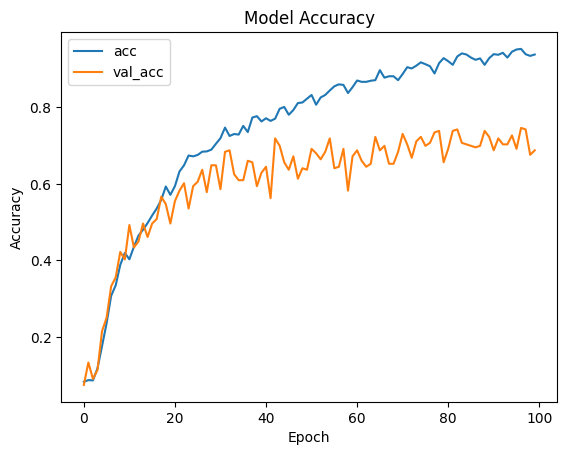

In [5]:
import matplotlib.pyplot as plt


# Plot training history
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
# Membuat generator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    path_dataset,
    target_size=(224, 224),  # Sesuaikan dengan ukuran input CNN Anda
    batch_size=batch_size,
    class_mode='categorical'  # Sesuaikan dengan jenis klasifikasi yang Anda lakukan
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print("Test Accuracy:", test_accuracy)


Found 1871 images belonging to 13 classes.
14/14 [==============================] - 4s 310ms/step - loss: 0.2900 - accuracy: 0.9420
Test Accuracy: 0.9419642686843872


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Mengambil satu gambar uji (gantilah path_file_gambar dengan path gambar yang ingin diuji)
path_file_gambar = "/content/AnimalML/AnimalML/orangutan/141_jpg.rf.4270b58ac9645cd80998ae1b840a425c.jpg"
img = image.load_img(path_file_gambar, target_size=(224, 224))

# Mengubah gambar menjadi larik numpy
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Normalisasi nilai pixel menjadi rentang [0, 1]
img_array /= 255.

# Melakukan prediksi menggunakan model
predictions = model.predict(img_array)

# Mengambil indeks kelas prediksi
predicted_class_index = np.argmax(predictions)

# Mencetak hasil prediksi
print("Kelas prediksi:", train_generator.class_indices)
print("Kelas hasil prediksi:", list(train_generator.class_indices.keys())[predicted_class_index])


1/1 [==============================] - 0s 289ms/step
Kelas prediksi: {'bear': 0, 'boar': 1, 'crow': 2, 'deer': 3, 'eagle': 4, 'elephant': 5, 'horse': 6, 'lion': 7, 'orangutan': 8, 'parrot': 9, 'tiger': 10, 'turtle': 11, 'zebra': 12}
Kelas hasil prediksi: orangutan


In [7]:
# Simpan model ke dalam file h5
model.save("model_saved.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
